In [3]:
import boto3
import statistics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Read file

In [4]:
all_jobs_df = pd.read_csv('tfjobs_runs.csv')
print(len(all_jobs_df))
all_jobs_df['num_replicas_in_sync'] = all_jobs_df['num_replicas_in_sync'].astype(str)
all_jobs_df['batch_size_per_replica'] = all_jobs_df['batch_size_per_replica'].astype(str)

reduced = all_jobs_df[['device','num_replicas_in_sync','n_workers','prefetch','cache','batch_size_per_replica',
                       'average_train_time','average_test_time','nodes','gpus_per_node']]
reduced

31


,device,num_replicas_in_sync,n_workers,prefetch,cache,batch_size_per_replica,average_train_time,average_test_time,nodes,gpus_per_node
0,gpu-v100,32,4.0,no,no,96,154.29,1.74,NaN,NaN
1,gpu-v100,4,2.0,no,no,96,898.97,14.97,NaN,NaN
2,gpu-v100,2,2.0,no,no,96,1779.27,22.12,NaN,NaN
3,gpu-v100,8,2.0,no,no,96,453.05,11.25,NaN,NaN
4,gpu-v100,64,8.0,no,no,96,145.38,1.19,NaN,NaN
5,gpu-v100,16,2.0,no,no,96,227.56,6.80,NaN,NaN
6,gpu-v100,128,16.0,no,no,96,136.24,1.19,NaN,NaN
7,gpu-v100,16,2.0,yes,no,96,229.66,7.36,NaN,NaN
8,gpu-v100,2,2.0,yes,no,96,1784.42,22.40,NaN,NaN
9,gpu-v100,64,8.0,yes,no,96,59.35,1.39,NaN,NaN


## Plot n_workers

In [5]:
batch_df = reduced.loc[(reduced['device'] == 'gpu-v100') & (reduced['num_replicas_in_sync'] == '32') & 
                      (reduced['prefetch'] == 'yes') & (reduced['batch_size_per_replica'] == '96') & 
                      (reduced['nodes'].isin([np.nan, 8, 16, 32]))]
train_times_different_nodes = sorted(list(batch_df['average_train_time']), reverse=True)
print(train_times_different_nodes)

batch_df = reduced.loc[(reduced['device'] == 'gpu-v100') & (reduced['num_replicas_in_sync'] == '32') & 
                      (reduced['prefetch'] == 'yes') & (reduced['batch_size_per_replica'] == '96') & 
                      (reduced['nodes'].isin([np.nan, '4']))]
train_times_different_4_nodes = sorted(list(batch_df['average_train_time']), reverse=True)
print(train_times_different_4_nodes)

batch_df

[129.84, 117.68, 116.11, 115.02]
[136.33, 119.82, 116.09, 115.02]


,device,num_replicas_in_sync,n_workers,prefetch,cache,batch_size_per_replica,average_train_time,average_test_time,nodes,gpus_per_node
13,gpu-v100,32,4.0,yes,no,96,115.02,3.37,NaN,NaN
26,gpu-v100,32,8.0,yes,no,96,116.09,3.62,4.0,8.0
27,gpu-v100,32,32.0,yes,no,96,136.33,9.61,4.0,8.0
28,gpu-v100,32,16.0,yes,no,96,119.82,5.35,4.0,8.0


[1 2 3 4]
saved


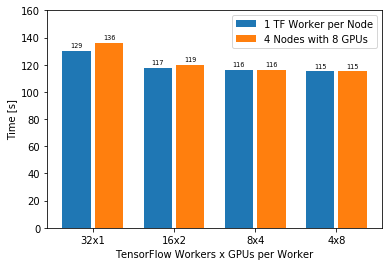

In [6]:
fig, ax = plt.subplots()
xticks = ['32x1', '16x2', '8x4', '4x8']
x = np.arange(1, len(xticks) + 1)
print(x)
rects1 = plt.bar(x - 0.2, np.array(train_times_different_nodes), width=0.35)
rects2 = plt.bar(x + 0.2, np.array(train_times_different_4_nodes), width=0.35)

plt.xticks(x, xticks)
plt.ylabel('Time [s]')
plt.xlabel('TensorFlow Workers x GPUs per Worker')
label_h_offset = 0.45

scale = 'linear'
plt.yscale(scale)

if scale == 'linear':
    plt.ylim(top=160)
    #yticks = [0, 500, 1000, 1500, 2000]
    #plt.yticks(yticks)
elif scale == 'log':
    plt.ylim(top=3000)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        if scale == 'linear':
            ax.text(rect.get_x()+rect.get_width()/2., 1*h + 2, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)
        elif scale == 'log':
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)

autolabel(rects1)
autolabel(rects2)

plt.legend(['1 TF Worker per Node', '4 Nodes with 8 GPUs'])

#plt.savefig('results/tfjobs_compare_hw_layout_' + scale + '.png', dpi=150)
print('saved')
plt.show()

## Plot batch size

In [12]:
batch_df = reduced.loc[(reduced['device'] == 'gpu-v100') & (reduced['num_replicas_in_sync'] == '32') & 
                      (reduced['prefetch'] == 'yes') & (reduced['n_workers'] == 4.0) & \
                       (reduced['nodes'].isin([np.nan])) & \
                       (reduced['batch_size_per_replica'].isin(['96','80','64','48','32','16']))]
train_times_batch_size = sorted(list(batch_df['average_train_time']), reverse=True)
print(train_times_batch_size)

batch_df

[182.65, 142.23, 128.19, 121.69, 120.11, 115.02]


,device,num_replicas_in_sync,n_workers,prefetch,cache,batch_size_per_replica,average_train_time,average_test_time,nodes,gpus_per_node
13,gpu-v100,32,4.0,yes,no,96,115.02,3.37,NaN,NaN
18,gpu-v100,32,4.0,yes,no,48,128.19,6.00,NaN,NaN
19,gpu-v100,32,4.0,yes,no,32,142.23,6.20,NaN,NaN
20,gpu-v100,32,4.0,yes,no,80,120.11,3.22,NaN,NaN
21,gpu-v100,32,4.0,yes,no,16,182.65,7.24,NaN,NaN
22,gpu-v100,32,4.0,yes,no,64,121.69,5.21,NaN,NaN


[1 2 3 4 5 6]
saved


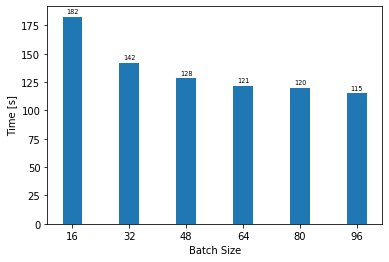

In [13]:
fig, ax = plt.subplots()
xticks = ['16', '32', '48', '64', '80', '96']
x = np.arange(1, len(xticks) + 1)
print(x)
rects1 = plt.bar(x, np.array(train_times_batch_size), width=0.35)

plt.xticks(x, xticks)
plt.ylabel('Time [s]')
plt.xlabel('Batch Size')
label_h_offset = 0.45

scale = 'linear'
plt.yscale(scale)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        if scale == 'linear':
            ax.text(rect.get_x()+rect.get_width()/2., 1*h + 2, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)
        elif scale == 'log':
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)

autolabel(rects1)

#plt.savefig('results/tfjobs_compare_batch_size_' + scale + '.png', dpi=150)
print('saved')
plt.show()

## Plot n_gpus_scaling

In [14]:
batch_df = reduced.loc[(reduced['device'] == 'gpu-v100') & \
                       (reduced['num_replicas_in_sync'].isin(['2','4','8','16','32','64','128'])) & 
                      (reduced['prefetch'] == 'yes') & (reduced.index < 23) & \
                       (reduced['batch_size_per_replica'].isin(['96']))]
train_times_scaling = sorted(list(batch_df['average_train_time']), reverse=True)
print(train_times_scaling)

batch_df

[1784.42, 900.49, 456.62, 229.66, 115.02, 59.35, 34.9]


,device,num_replicas_in_sync,n_workers,prefetch,cache,batch_size_per_replica,average_train_time,average_test_time,nodes,gpus_per_node
7,gpu-v100,16,2.0,yes,no,96,229.66,7.36,NaN,NaN
8,gpu-v100,2,2.0,yes,no,96,1784.42,22.40,NaN,NaN
9,gpu-v100,64,8.0,yes,no,96,59.35,1.39,NaN,NaN
10,gpu-v100,4,2.0,yes,no,96,900.49,11.40,NaN,NaN
11,gpu-v100,8,2.0,yes,no,96,456.62,8.05,NaN,NaN
12,gpu-v100,128,16.0,yes,no,96,34.90,1.64,NaN,NaN
13,gpu-v100,32,4.0,yes,no,96,115.02,3.37,NaN,NaN


[1 2 3 4 5 6 7]
saved


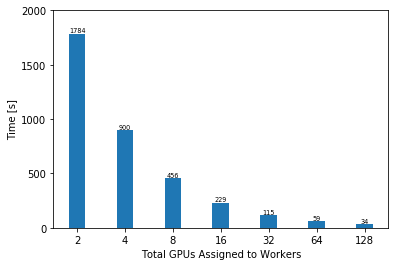

In [15]:
fig, ax = plt.subplots()
xticks = ['2','4','8','16','32','64','128']
x = np.arange(1, len(xticks) + 1)
print(x)
rects1 = plt.bar(x, np.array(train_times_scaling), width=0.35)

plt.xticks(x, xticks)
plt.ylabel('Time [s]')
plt.xlabel('Total GPUs Assigned to Workers')
label_h_offset = 0.45

scale = 'linear'
plt.yscale(scale)

if scale == 'linear':
    plt.ylim(top=2000)
    yticks = [0, 500, 1000, 1500, 2000]
    plt.yticks(yticks)
elif scale == 'log':
    from matplotlib.ticker import ScalarFormatter
    ax.yaxis.set_major_formatter(ScalarFormatter())
    yticks = [10, 100, 1000]
    plt.yticks(yticks)
    plt.ylim(top=2300) 

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        if scale == 'linear':
            ax.text(rect.get_x()+rect.get_width()/2., 1*h + 2, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)
        elif scale == 'log':
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)

autolabel(rects1)

#plt.savefig('results/tfjobs_compare_n_gpus_scaling_' + scale + '.png', dpi=150)
print('saved')
plt.show()

## Plot batch times

[115.02]
epoch_1_batch_times
13    ['2.840041399002075', '2.8939361572265625', '2...
Name: epoch_1_batch_times, dtype: object
["'2.840041399002075'", "'2.8939361572265625'", "'2.9473249912261963'", "'2.891810655593872'", "'2.86444354057312'", "'2.8691301345825195'", "'2.959407091140747'", "'2.851477861404419'", "'2.8650755882263184'", "'2.833679676055908'", "'2.8536577224731445'", "'2.8431057929992676'", "'2.8657054901123047'", "'2.893963098526001'", "'2.8429622650146484'", "'2.8446803092956543'", "'2.8903965950012207'", "'2.865553140640259'", "'2.8854775428771973'", "'2.8490896224975586'", "'2.8635048866271973'", "'2.8822431564331055'", "'2.897123336791992'", "'2.8446648120880127'", "'2.8494555950164795'", "'2.8568973541259766'", "'2.9378228187561035'", "'2.9028642177581787'", "'2.851147413253784'", "'2.837806224822998'", "'2.84652042388916'", "'2.891364097595215'", "'2.861642837524414'", "'2.861466884613037'", "'2.8554069995880127'", "'2.883577823638916'", "'2.849550485610962'", "'2.

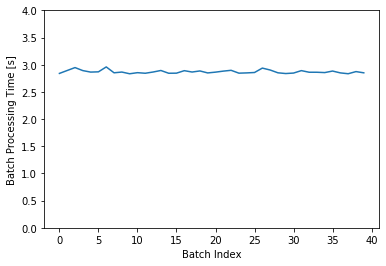

In [16]:
batch_df = all_jobs_df.loc[(all_jobs_df['device'] == 'gpu-v100') & (all_jobs_df['num_replicas_in_sync'] == '32') & 
                      (all_jobs_df['prefetch'] == 'yes') & (all_jobs_df['batch_size_per_replica'] == '96') & 
                      (all_jobs_df['nodes'].isin([np.nan, '4']))  & (all_jobs_df['n_workers'] == 4)]
train_times_different_4_nodes = sorted(list(batch_df['average_train_time']), reverse=True)
train_times_batch_size = sorted(list(batch_df['average_train_time']), reverse=True)
print(train_times_batch_size)

def get_batch_times_for_epoch(df, epoch_n):
    metrics = 'epoch_' + str(epoch_n) + '_batch_times'
    return df[metrics], metrics

batch_df, metrics = get_batch_times_for_epoch(batch_df, 1)
print(metrics)
print(batch_df)
split_res = batch_df.values[0][1:-2].split(', ')
print(split_res)
lst = [float(x[1:-1]) for x in split_res]
lst
plt.plot(lst)
plt.xlabel('Batch Index')
plt.ylabel('Batch Processing Time [s]')
plt.ylim(0, 4)
#plt.savefig('results/batch_times_4_workers.png', dpi=150)
plt.show()

# Plot TPUs

In [28]:
tpus_v2 = reduced.loc[(reduced['device'].isin(['tpu-preemtible-v2']))]
tpus_v3 = reduced.loc[(reduced['device'].isin(['tpu-preemtible-v3']))]

tpus_v2_list = sorted(list(tpus_v2['average_train_time']), reverse=True)
tpus_v3_list = sorted(list(tpus_v3['average_train_time']), reverse=True)

tpus_v2_list = [tpus_v2_list[0], 0, tpus_v2_list[1], 0, 0, 0, 0]
tpus_v3_list = [tpus_v3_list[0], 0, tpus_v3_list[1], 0, 0, 0, 0]

tpus_v3_list

[416.29, 0, 103.16, 0, 0, 0, 0]

[1 2 3 4 5 6 7]
saved


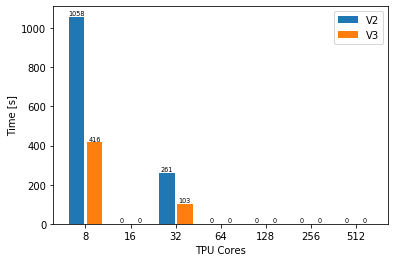

In [30]:
fig, ax = plt.subplots()
xticks = ['8', '16', '32', '64', '128', '256', '512']
x = np.arange(1, len(xticks) + 1)
print(x)
rects1 = plt.bar(x - 0.2, np.array(tpus_v2_list), width=0.35)
rects2 = plt.bar(x + 0.2, np.array(tpus_v3_list), width=0.35)

plt.xticks(x, xticks)
plt.ylabel('Time [s]')
plt.xlabel('TPU Cores')
label_h_offset = 0.45

scale = 'linear'
plt.yscale(scale)


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        if scale == 'linear':
            ax.text(rect.get_x()+rect.get_width()/2., 1*h + 2, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)
        elif scale == 'log':
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize=6.5)

autolabel(rects1)
autolabel(rects2)

plt.legend(['V2', 'V3'])

#plt.savefig('results/tfjobs_compare_hw_layout_' + scale + '.png', dpi=150)
print('saved')
plt.show()